In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
url='https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data'

In [4]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anuragacp
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


100%|██████████| 25.6k/25.6k [00:00<00:00, 23.6MB/s]

In [5]:
import joblib
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
df=pd.read_csv('/content/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


So by taking a look at the above data frame I can see that the column quality is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem!

## Exploratory Data Analysis (EDA)

In [8]:
df.shape

(1599, 12)

In [9]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


none of the columns have any object data type values and our label is the only integer value making all the feature columns as float datatype i.e. similar datatype.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


As per observation:

There is a big gap between 75% and max values of residual sugar column
There is a big gap between 75% and max values of free sulfur dioxide column
There is a huge gap between 75% and max value of total sulfur dioxide column
All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

In [12]:
df.skew() # acceptable range is +/-0.5

,0
fixed acidity,0.982751
volatile acidity,0.671593
citric acid,0.318337
residual sugar,4.540655
chlorides,5.680347
free sulfur dioxide,1.250567
total sulfur dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


we can see skewness present in our dataset. We will ignore quality since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

## Data Visualization

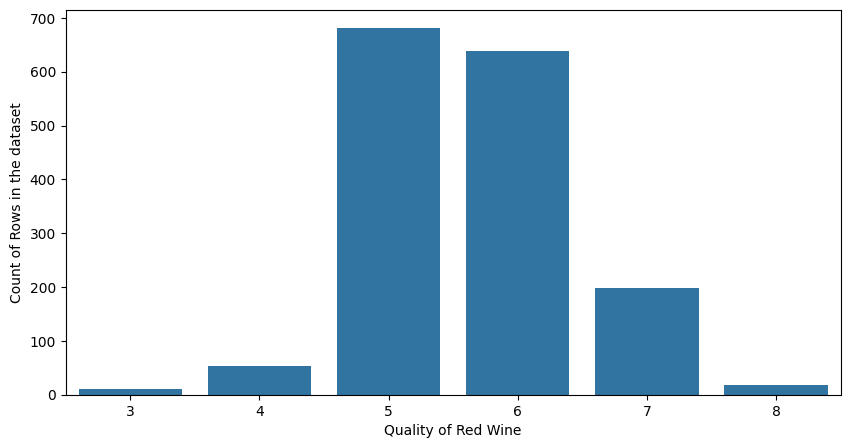

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df,x=df['quality']);
plt.xlabel('Quality of Red Wine');
plt.ylabel('Count of Rows in the dataset');



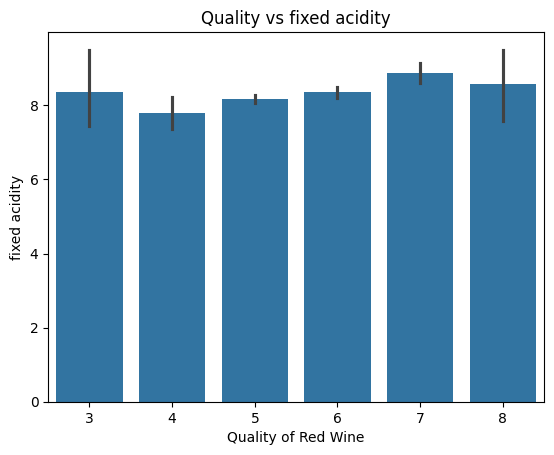

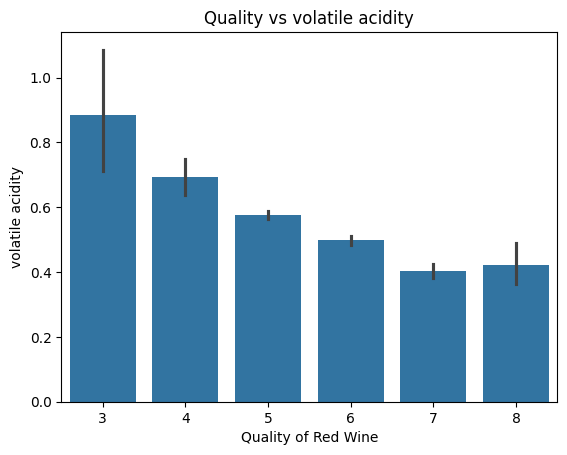

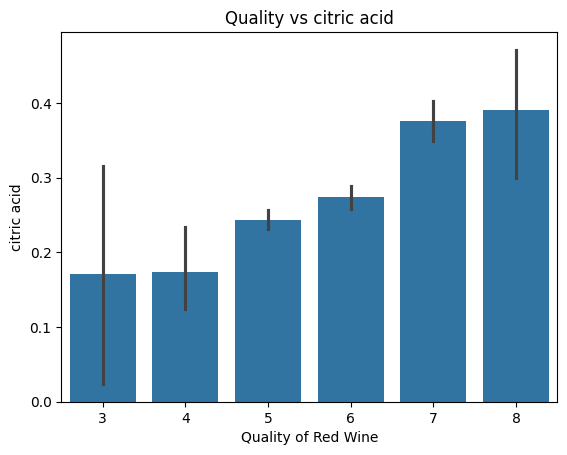

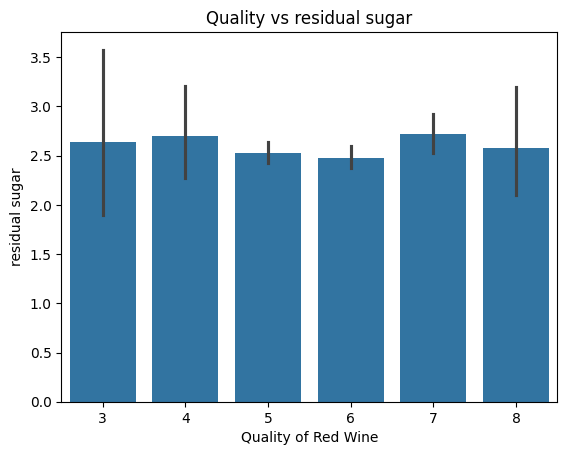

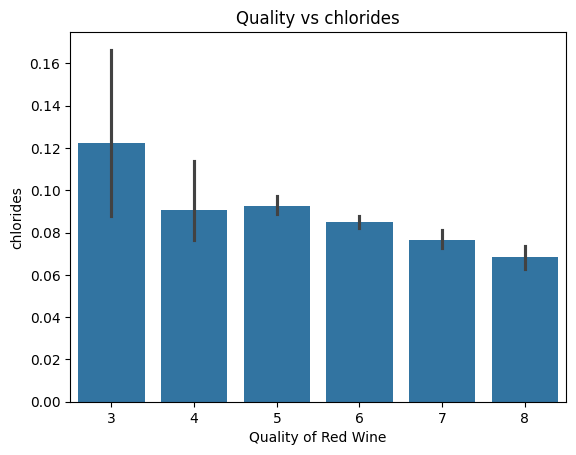

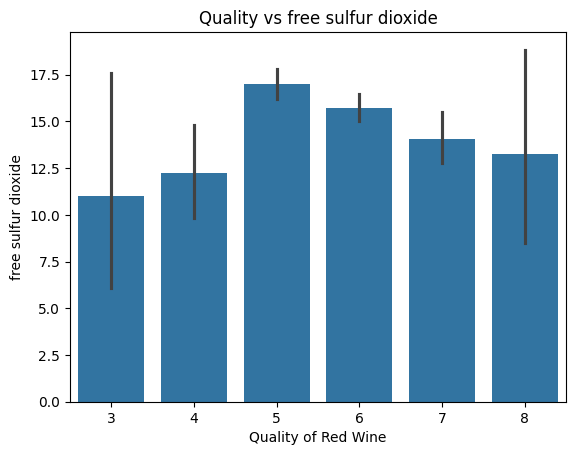

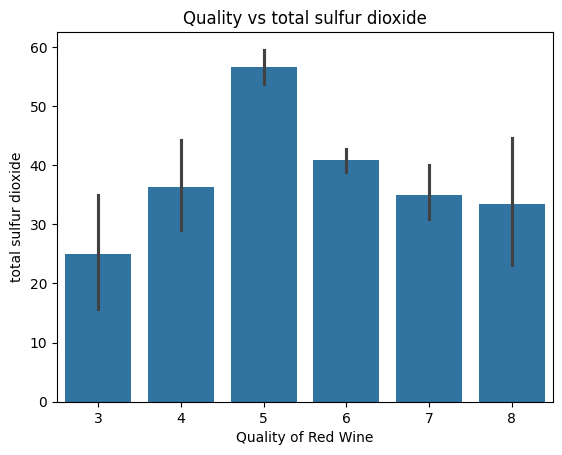

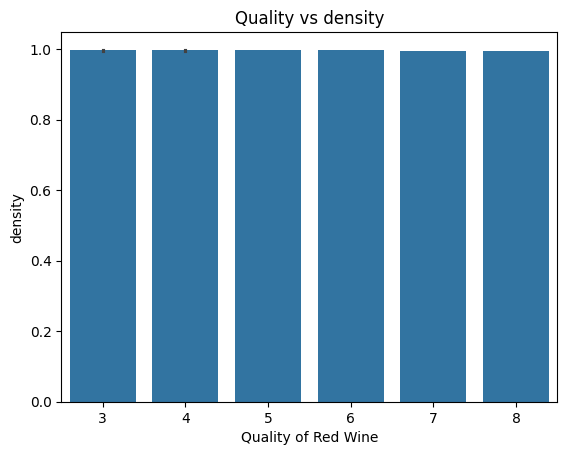

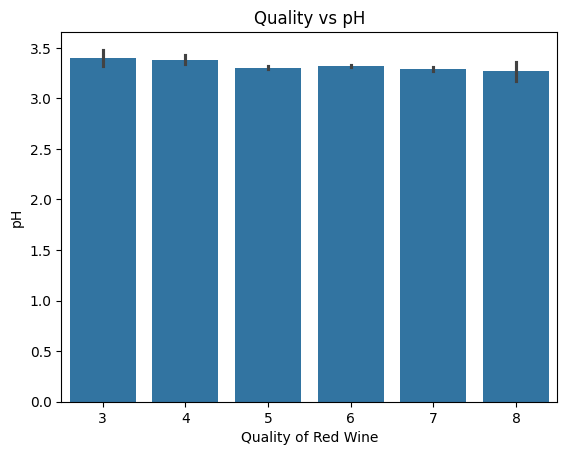

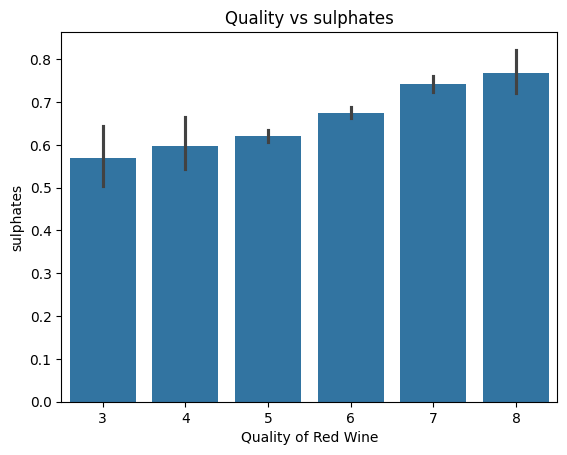

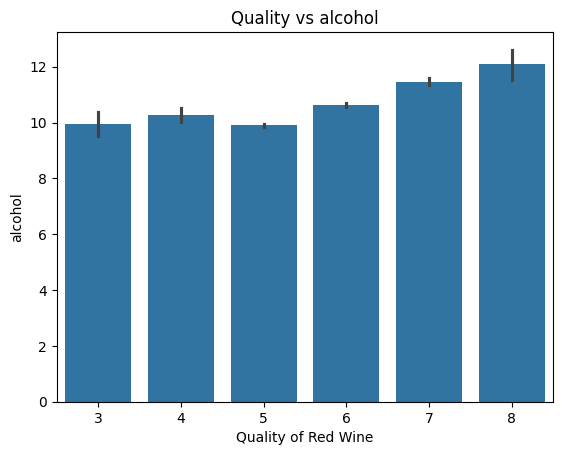

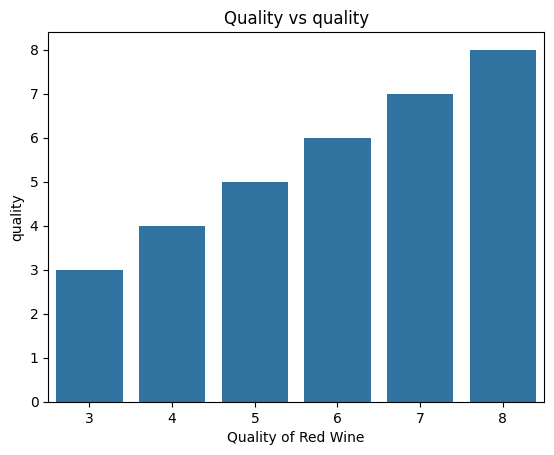

In [14]:
for i in range(len(df.columns)):
    sns.barplot(x=df['quality'], y=df[df.columns[i]])
    plt.xlabel('Quality of Red Wine')
    plt.ylabel(df.columns[i])
    plt.title(f'Quality vs {df.columns[i]}')
    plt.show()

With the feature vs label barplot we are able to see the trend corresponding to the impact each has with respect to predicting the quality column (our target variable).

Observations regarding feature compared to the label are:

1.fixed acidity vs quality - no fixed pattern

2.volatile acidity vs quality - there is a decreasing trend

3.citric acid vs quality - there is an increasing trend

4.residual sugar vs quality - no fixed pattern

5.chlorides vs quality - there is a decreasing trend

6.free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing

7.total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing

8.density vs quality - no pattern at all

9.pH vs quality - no pattern at all

10.sulphates vs quality - there is an increasing trend

11.alcohol vs quality - there is an increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

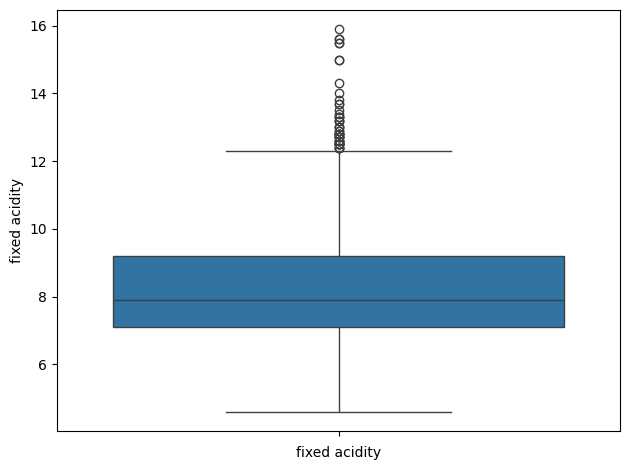

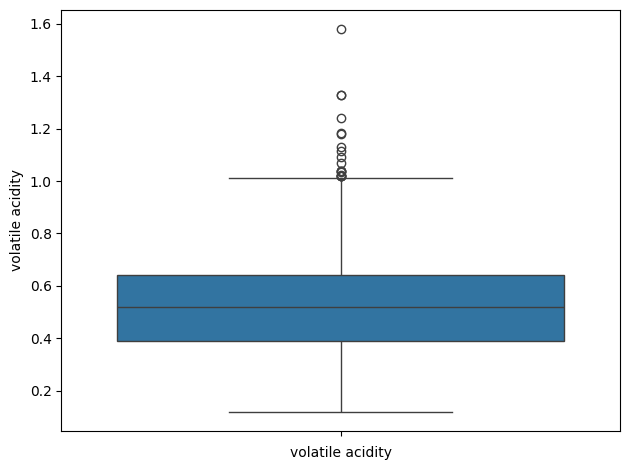

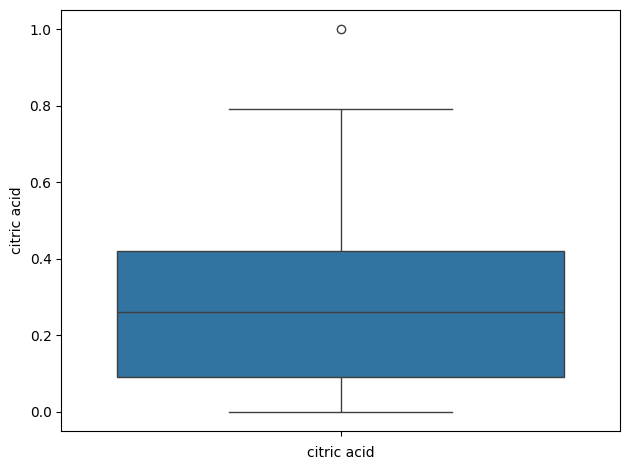

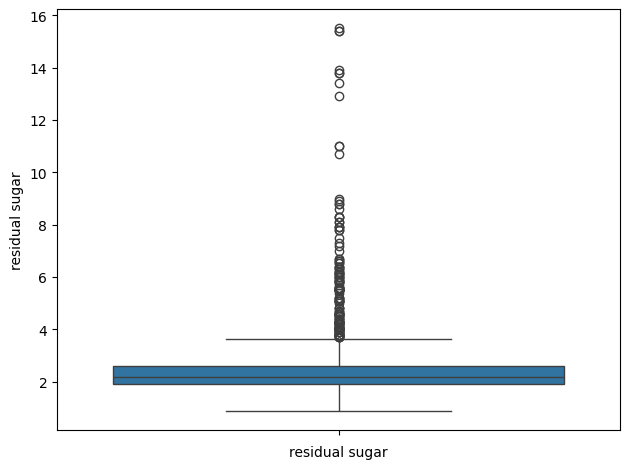

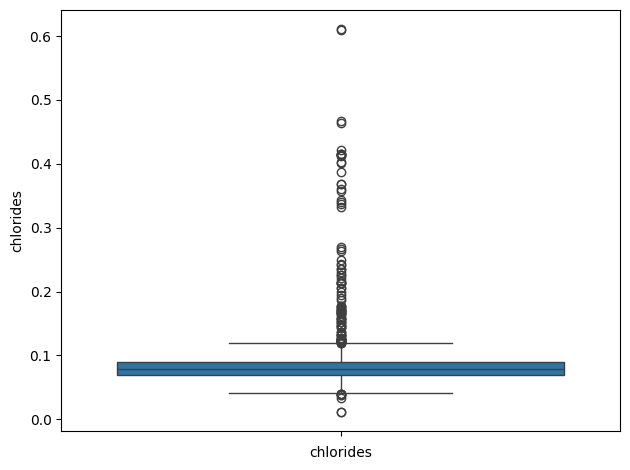

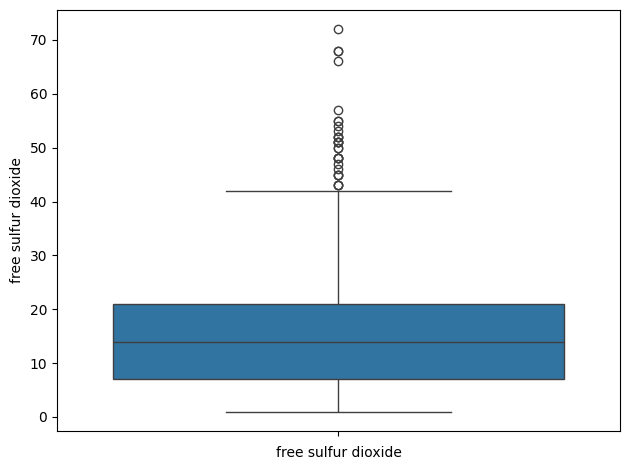

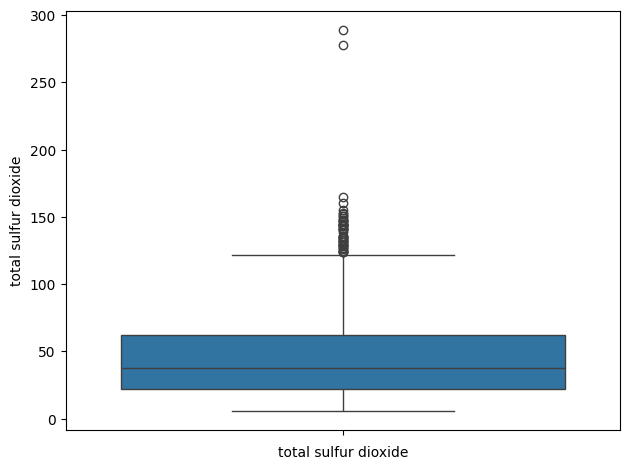

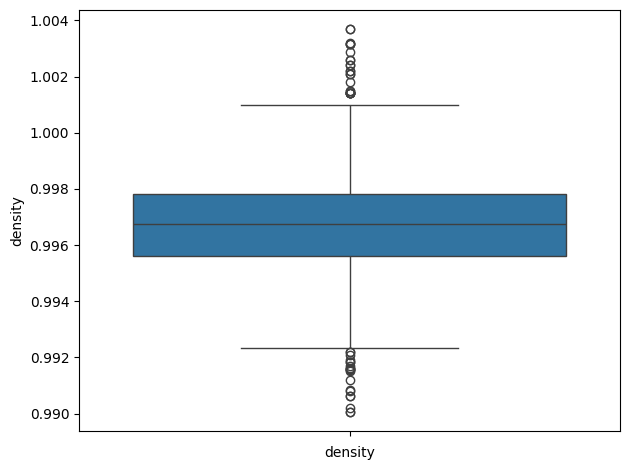

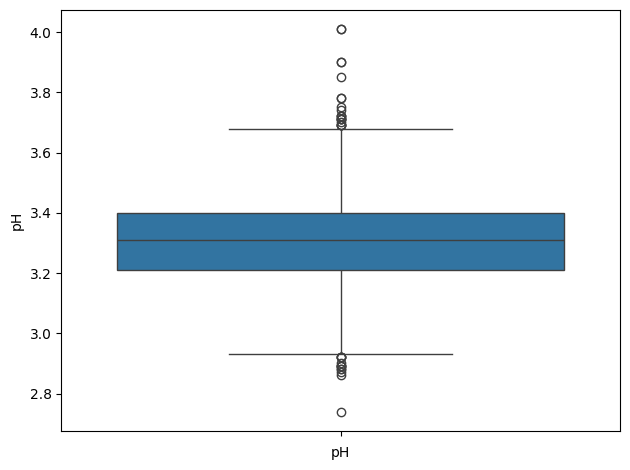

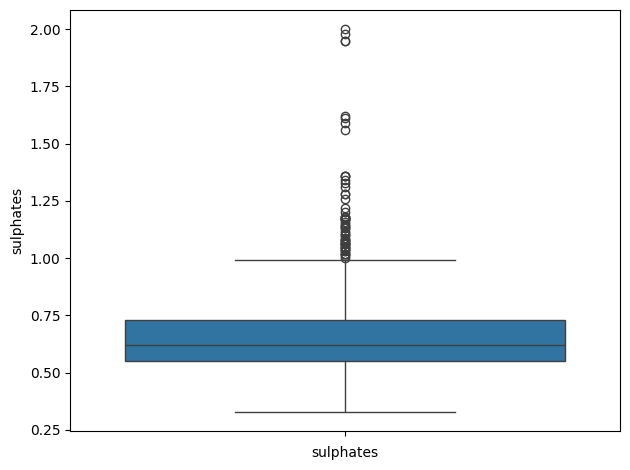

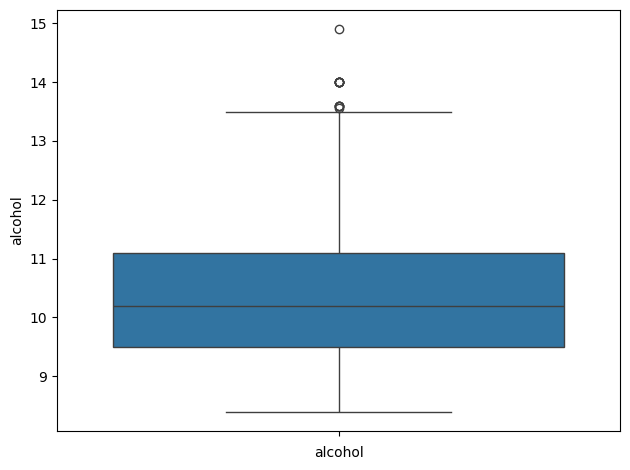

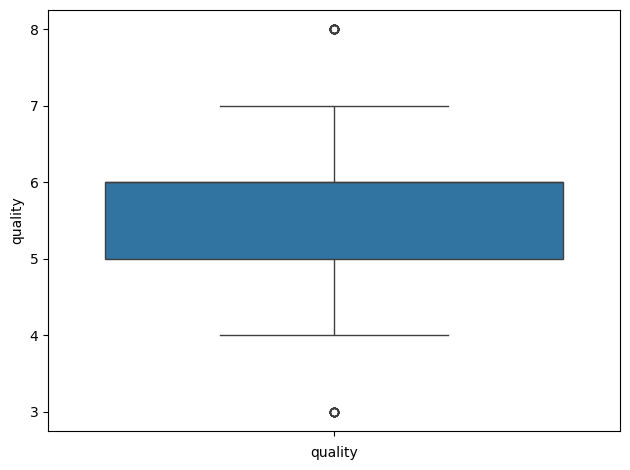

In [15]:
for col in df.columns:
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

With the help of the above boxplot we are able to see the whisker details and outliers clearly. I am ignoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset.

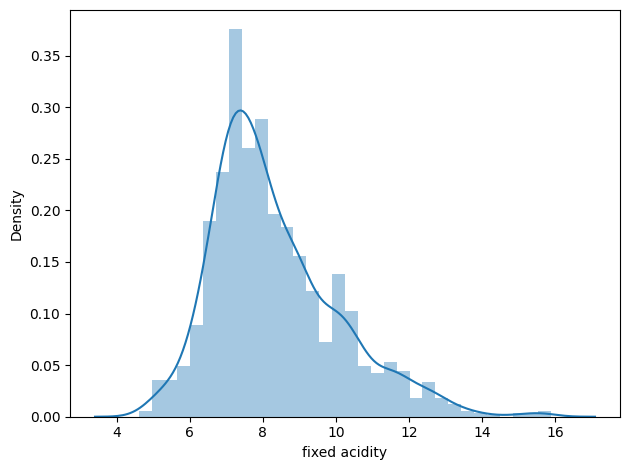

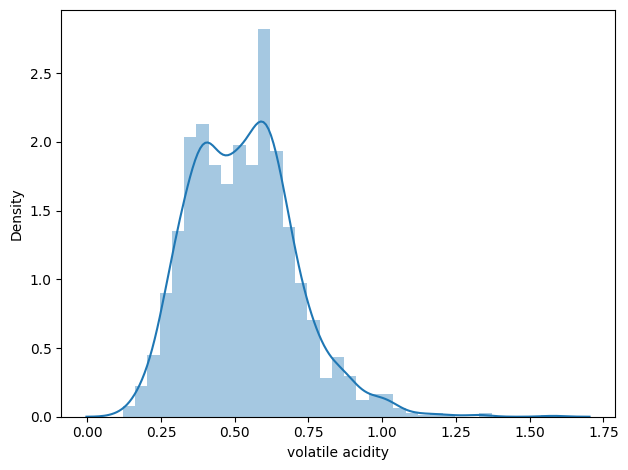

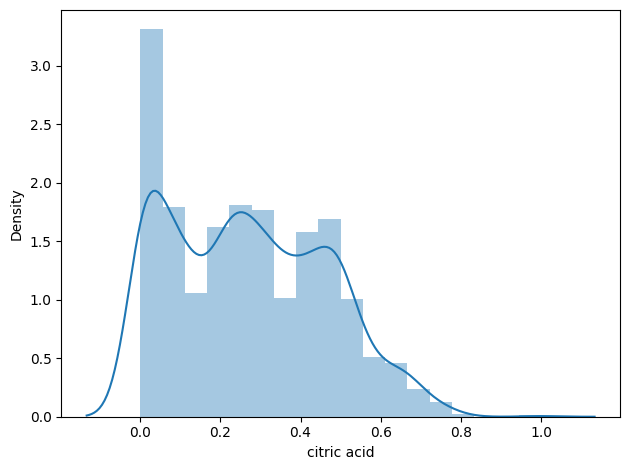

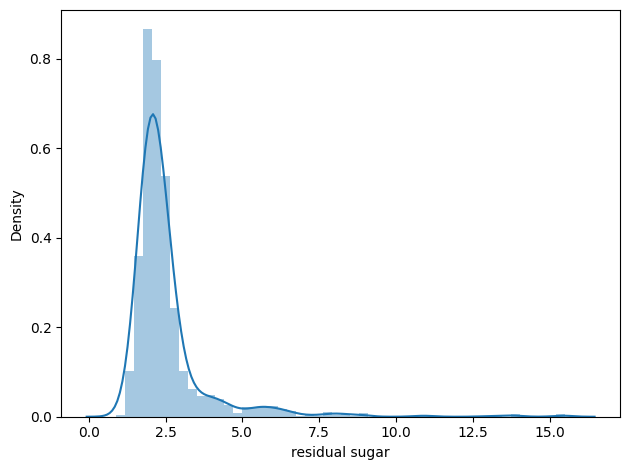

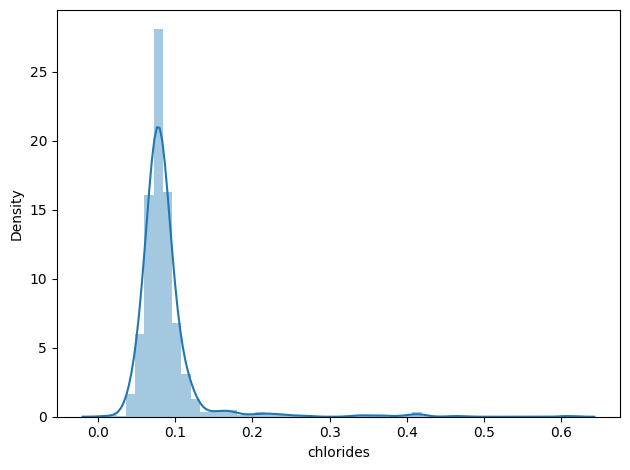

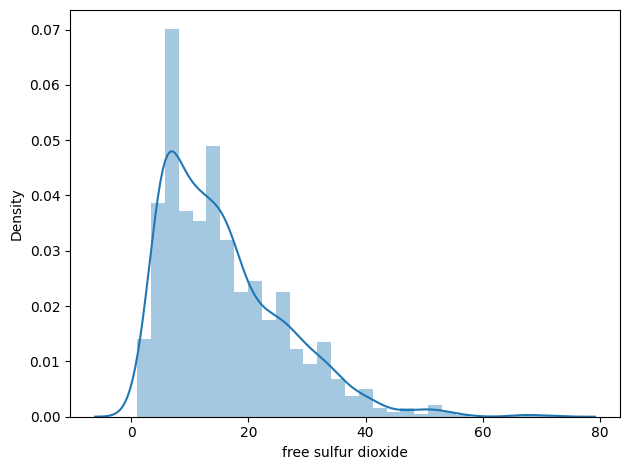

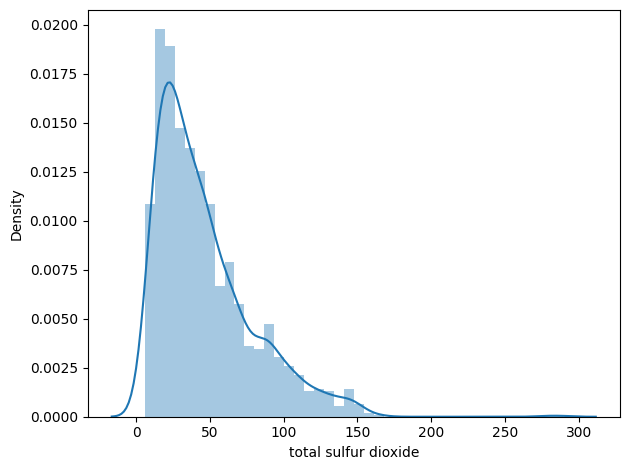

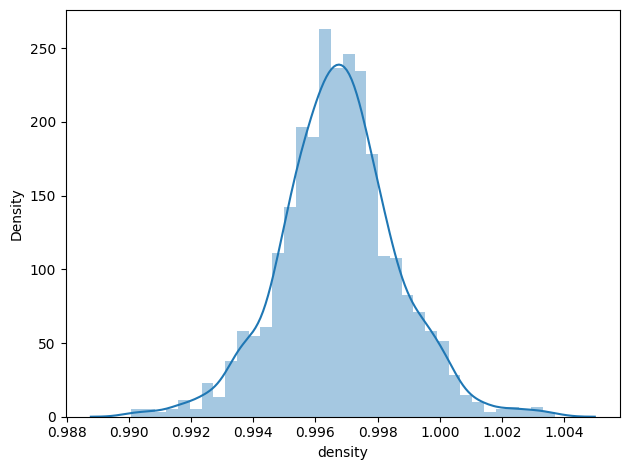

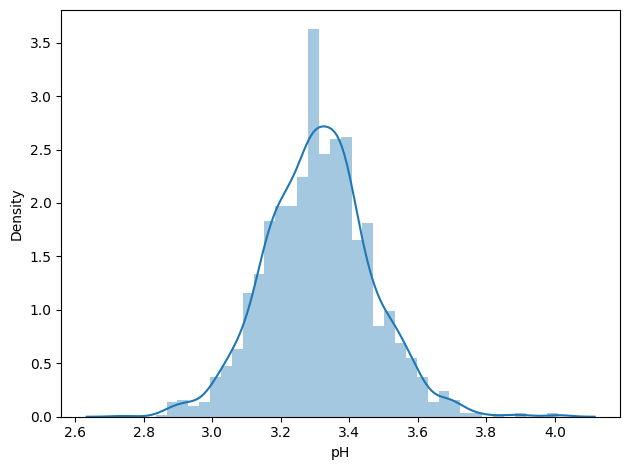

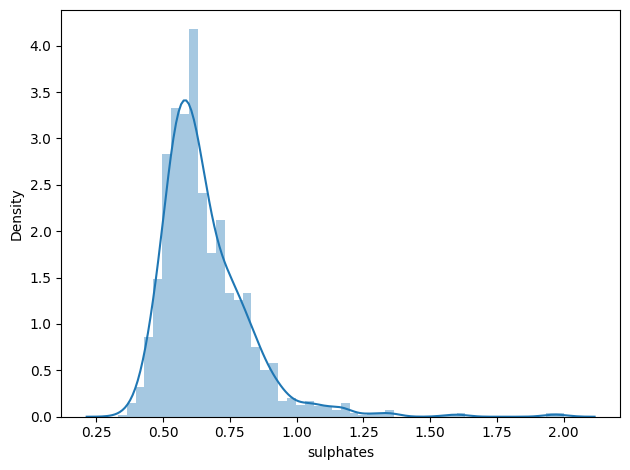

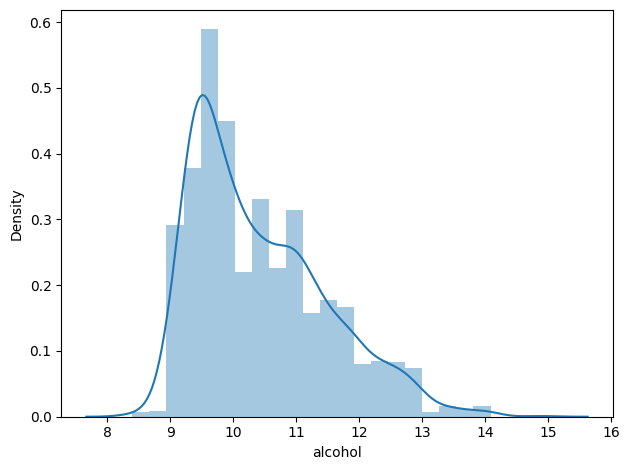

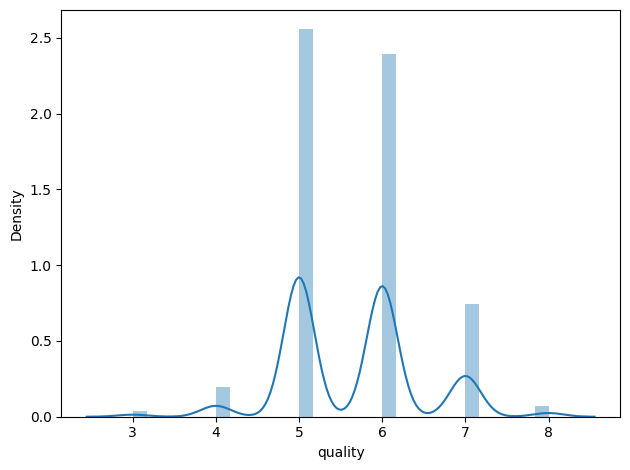

In [16]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

## Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [17]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

In [18]:
df=df.drop(columns='free sulfur dioxide')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I feel that free sulfur dioxide and total sulfur dioxide are both indicating towards the same feature of sulfur dioxide therefore I am dropping the free option and keeping just the total option in our dat

## Outlier removal

In [19]:
df.shape

(1599, 11)

Confirming the number of columns and rows before removing the outliers from the dataset.

In [20]:
z=np.abs(zscore(df))
threshole=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I have used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [21]:
df.shape

(1464, 11)

Checking the number of rows present in the dataset after applying the outlier removal technique.

In [22]:
data_loss=(1599-1464)/1599*100
print(data_loss)

8.442776735459661


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set post removal of the outliers.

In [23]:
X = df.drop('quality', axis=1)
Y = df['quality']

## Taking care of class imbalance

In [24]:
Y.value_counts()

,count
quality,
5,624
6,590
7,187
4,47
8,16


Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [25]:
# adding samples to make all the categorical quality values same
oversample = SMOTE()
X,Y=oversample.fit_resample(X,Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [26]:
Y.value_counts()

,count
quality,
5,624
6,624
7,624
4,624
8,624


After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [27]:
Y # Displaying just the label

,quality
0,5
1,5
2,5
3,6
4,5
...,...
3115,8
3116,8
3117,8
3118,8


## Label Binarization

In [28]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

,quality
0,0
1,0
2,0
3,0
4,0
...,...
3115,1
3116,1
3117,1
3118,1


Using the label binarization technique we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [29]:
X # Displaying all the features except the label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,7.389980,0.361002,0.300501,1.810020,0.073098,24.250509,0.994217,3.239499,0.703006,11.394990
3116,10.050926,0.520809,0.592851,4.612201,0.083061,25.612743,0.998249,3.267759,0.752454,13.179575
3117,10.679153,0.349198,0.530481,2.603207,0.070160,16.016036,0.997187,3.150000,0.654330,11.011225
3118,8.834433,0.410623,0.441575,1.800000,0.069407,13.875463,0.994907,3.284359,0.690000,12.075093


## Feature Scaling

In [30]:
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.664155,1.046891,-1.486853,-0.643092,-0.146018,-0.108471,0.808369,1.479837,-0.789489,-1.234091
1,-0.415598,2.069794,-1.486853,0.129926,1.087080,1.153829,0.205064,-0.749354,0.106523,-0.877417
2,-0.415598,1.387859,-1.284275,-0.201367,0.750781,0.656559,0.325725,-0.317898,-0.117480,-0.877417
3,1.697141,-1.339882,1.349228,-0.643092,-0.202068,0.886068,0.929030,-1.036992,-0.640153,-0.877417
4,-0.664155,1.046891,-1.486853,-0.643092,-0.146018,-0.108471,0.808369,1.479837,-0.789489,-1.234091
...,...,...,...,...,...,...,...,...,...,...
3115,-0.670382,-0.879565,0.035014,-0.742457,-0.308666,-0.481404,-1.353542,-0.465319,0.278304,0.544808
3116,0.983114,0.028585,1.515601,2.352023,0.249751,-0.429297,1.079215,-0.262106,0.647518,2.136093
3117,1.373490,-0.946643,1.199732,0.133468,-0.473329,-0.796385,0.438646,-1.108901,-0.085151,0.202612
3118,0.227193,-0.597581,0.749474,-0.753523,-0.515578,-0.878265,-0.937106,-0.142735,0.181191,1.151244


Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

## Creating the training and testing data sets

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

In [32]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

    # Training the model
    model.fit(X_train, Y_train)

    # Predicting Y_test
    pred = model.predict(X_test)

    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)

    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)

    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)

    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [33]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 91.02564102564102

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       391
           1       0.86      0.91      0.88       233

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 87.40384615384616

Accuracy Score - Cross Validation Score is 3.6217948717948616


In [34]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.94871794871796

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       391
           1       0.90      0.92      0.91       233

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624

Cross Validation Score: 89.93589743589743

Accuracy Score - Cross Validation Score is 3.012820512820525


In [35]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.46794871794873

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       391
           1       0.88      0.92      0.90       233

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.93      0.92      0.93       624

Cross Validation Score: 88.62179487179486

Accuracy Score - Cross Validation Score is 3.846153846153868


In [36]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.83333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       391
           1       0.93      0.97      0.95       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 91.98717948717949

Accuracy Score - Cross Validation Score is 3.846153846153854


In [37]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 91.02564102564102

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       391
           1       0.84      0.93      0.89       233

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624

Cross Validation Score: 88.17307692307692

Accuracy Score - Cross Validation Score is 2.852564102564102


In [38]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 96.47435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       391
           1       0.93      0.97      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.97      0.96       624
weighted avg       0.97      0.96      0.96       624

Cross Validation Score: 93.17307692307692

Accuracy Score - Cross Validation Score is 3.301282051282058


In [39]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 96.7948717948718

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       391
           1       0.93      0.99      0.96       233

    accuracy                           0.97       624
   macro avg       0.96      0.97      0.97       624
weighted avg       0.97      0.97      0.97       624

Cross Validation Score: 92.17948717948717

Accuracy Score - Cross Validation Score is 4.615384615384627


In [40]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1015, number of negative: 1481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 2496, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406651 -> initscore=-0.377829
[LightGBM] [Info] Start training from score -0.377829
Accuracy Score: 95.99358974358975

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       391
           1       0.93      0.97      0.95       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

[LightGBM] [Warning] Found whitespace in fe

## Hyper parameter tuning on the best ML Model

In [41]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [42]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [43]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [44]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [45]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.94871794871796


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

## AUC ROC Curve

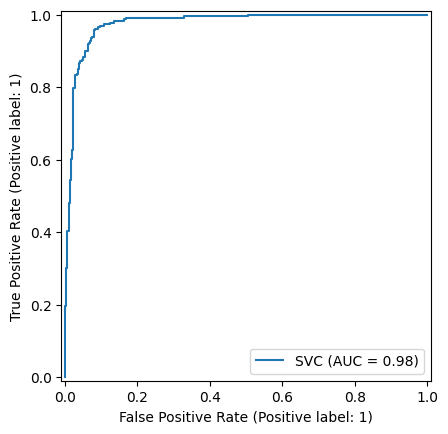

In [46]:
# disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
RocCurveDisplay.from_estimator(Final_Model, X_test, Y_test)
# disp.figure_.suptitle("ROC Curve")
# plt.show()

## Confusion Matrix

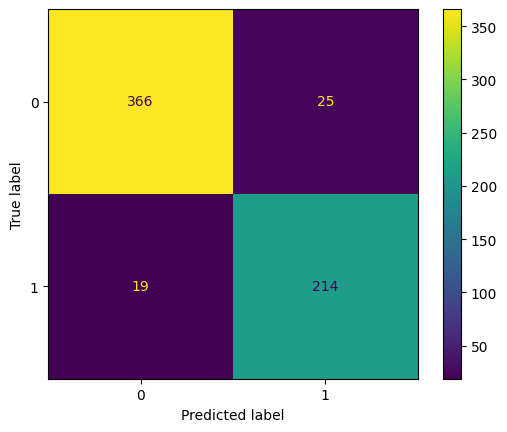

In [47]:
# class_names = df.columns
# metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
ConfusionMatrixDisplay.from_estimator(Classifier, X_test, Y_test)
# plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
# plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

In [48]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']